# Лекция 1. Основы Cтатистики ч.2

## Содержание
[1.2 Постановка задачи](#1.2)  
[1.3 Расстояние Пирсона](#1.3)   
[1.4 Распределение Хи-квадрат Пирсона](#1.4)  
[1.5 Расчет p-уровня значимости](#1.5)  
[](#1.6)  
[](#1.7)  
[](#1.8)  
[](#1.9)  

## 1.2 Постановка задачи<a id='1.2'></a>

### Статистические методы:  
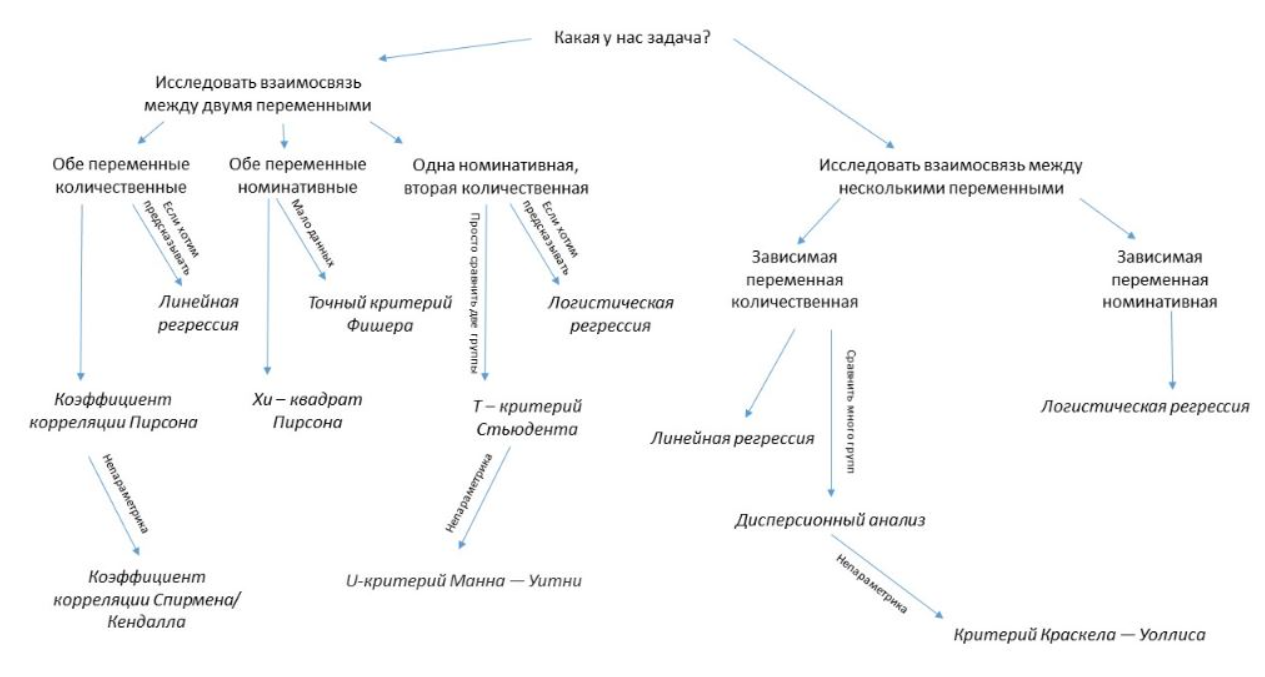  

**Основные типы задач анализа номинативных данных:**  
1) Проверка гипотезы о распределении **номинативной переменной**;  
2) Проверка гипотезы о взаимосвязи **двух номинативных переменных**;  
3) Логистичесская регрессия.

## 1.3 Расстояние Пирсона<a id='1.3'></a>

### Основные определения и тезисы: 
**Хи-квадрат Пирсона** (Chi²) - используется для оценки того, насколько хорошо эмпирические частоты в кросс-таблице соответствуют ожидаемым частотам, если две переменные независимы. Расстояние хи-квадрат не может быть отрицательным.  

**Формула для вычисления**: Chi² = Σ((O - E)^2 / E)  
где O - фактические частоты, E - ожидаемые частоты, и Σ - сумма по всем ячейкам кросс-таблицы.  

### Примеры:

Задача: Определить, насколько статистически значимы различия между теоретическими и эмпирическими значениями:  
H0: Распределение частот не отличимо от ожидаемого;  
H1: Распределение частот отличимо от ожидаемого.  
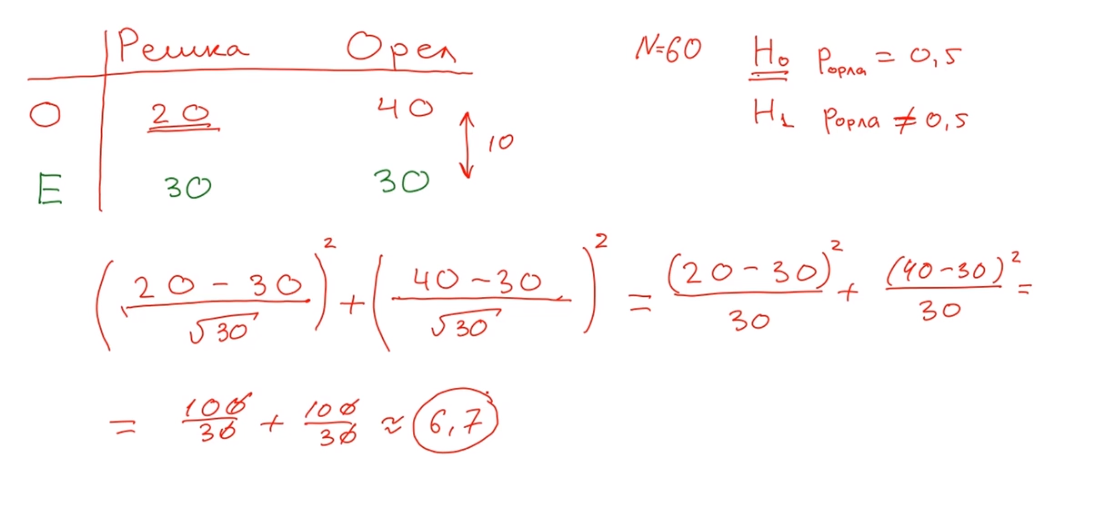  


    Подсчет вручную:
    Chi² = 6.666666666666667
    
    Подсчёт методом stats.chisquare:
    Chi² = 6.666666666666667
    


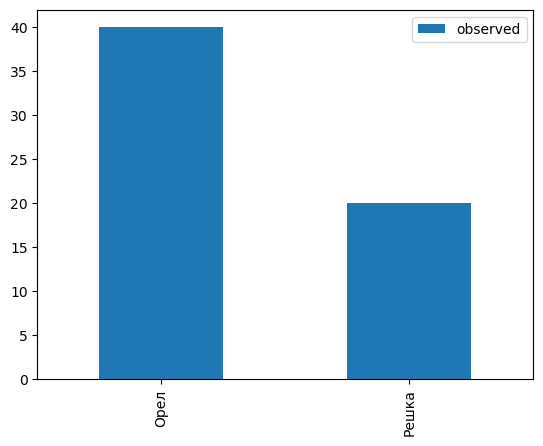

In [3]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

def coin(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    df.loc['observed'].to_frame().plot(kind='bar')
    # Вручную
    chi = ((tail - expected_num)**2) / expected_num + ((eagle - expected_num)**2) / expected_num
    # scipy.stats
    chi_2, p_2 = stats.chisquare([tail,eagle])
    print(f'''
    Подсчет вручную:
    Chi\N{SUPERSCRIPT TWO} = {chi}
    
    Подсчёт методом stats.chisquare:
    Chi\N{SUPERSCRIPT TWO} = {chi_2}
    ''')
coin(tail=20, eagle=40)

In [16]:
""" Монах Грегор Иоганн выращивал горох трех цветов (бедняга надеялся, что это поможет ему сделать важное открытие).  
    В одном из опытов эмпирическое распределение частот некоторого цвета гороха приняло следующий вид:  
    18, 55, 27 
    Чему будут равны ожидаемые значения частот, если предполагаемое теоретическое распределение имеет следующий вид:
    1:2:1"""

obs1, obs2, obs3= 18, 55, 27
obs_sum = obs1 + obs2 + obs3

coef1, coef2, coef3 = 1, 2, 1  
coef_sum = coef1 + coef2 + coef3

E1, E2, E3 = [obs_sum / coef_sum * coef for coef in [coef1, coef2, coef3]]
print(E1,E2,E3, sep=", ")

25.0, 50.0, 25.0


In [22]:
""" Рассчитайте расстояние хи-квадрат и введите получившееся значение с точностью хотя бы до одной цифры после запятой."""
Chi_sq = ((obs1 - E1)**2 / E1) + ((obs2 - E2)**2 / E2) + ((obs3 - E3)**2 / E3)
round(Chi_sq, 1)
# stats.chisquare([18,55,27], f_exp=[25, 50, 25])

2.6

## 1.4 Распределение Хи-квадрат Пирсона<a id='1.4'></a>

### Основные определения и тезисы:
**Распределение Хи-квадрат** с **k** степенями свободы(кол-во слагаемых) - это распределение суммы квадратов k независимых стандартных нормальных случайных величин.  
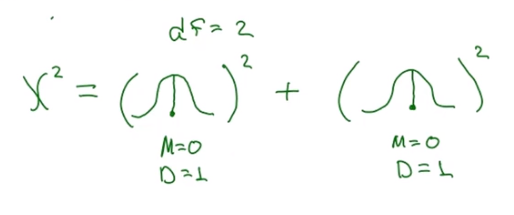  
Если верна H0, распределение ассиметрично, большинство значений группируются около нуля. Но чем больше число степеней свободы, тем более симметричным становится оно становится, и тем больше стремится к нормальному.

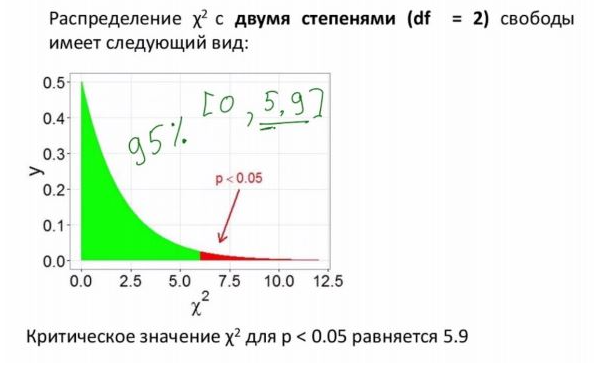  

### Примеры:

In [40]:
"""Рассчет критического значения Chi_squared """
from scipy import stats
stats.distributions.chi2.ppf(df=2, q=0.95)

5.991464547107979

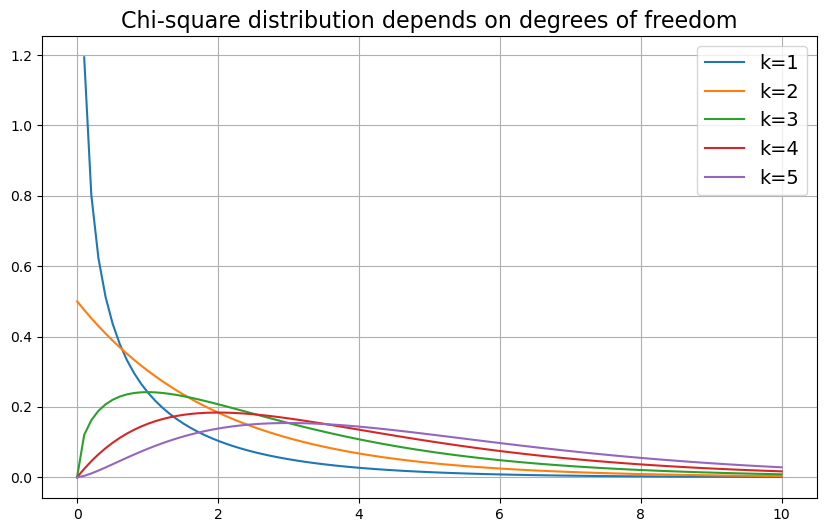

In [38]:
"""Распределение Chi_squared в зависимости от количества степеней свободы"""
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, stats.chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

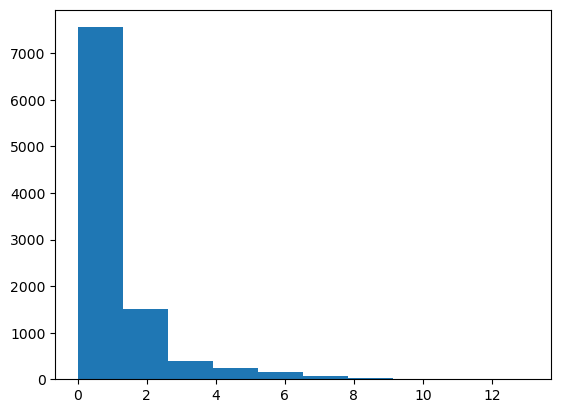

In [25]:
""" Как будет выглядеть распределение расстояния хи-квадрат в нашем эксперименте с монеткой при многократном 
    повторении эксперимента (при условии, что верна нулевая гипотеза). 
    Представьте, что мы при каждом повторении эксперимента рассчитываем расстояние хи - квадрат и в итоге 
    строим гистограмму получившихся значений."""
import random
import matplotlib.pyplot as plt

y = []
# 10000 экспериментов
for i in range(10000):

    x = []
    # 60 бросков монеты
    for i in range(60):
        x.append(random.randint(0, 1))
    # рассчет chi_squared
    y.append((x.count(0) - 30)**2 / 30 + (x.count(1) - 30)**2 / 30)
    
plt.hist(y)
plt.show()

## 1.5 Расчет p-уровня значимости<a id='1.5'></a>

### Основные определения и тезисы:
**Критерий Пирсона**(Pearson's chi-squared test) - измеряет разницу между ожидаемыми и фактическими частотами в двух категориальных независимых переменных, и вычисляет вероятность получить такое или более экстремальное распределение. 

**Применение критерия Пирсона**:  
1) Сформулировать гипотезы. H0 - две категориальные переменные независимы, а альтернативная гипотеза H1 заключается в том, что они зависимы.  
2) Собрать данные в кросс-таблицу, показывающей количество наблюдений для каждой комбинации значений двух переменных.  
3) Вычислить ожидаемые частоты.  
4) Вычислить статистику критерия. Статистика критерия вычисляется путем сравнения фактических и ожидаемых частот в кросс-таблице.  
5) Вычислить p-value, путем сравнения статистики критерия с соответствующим распределением хи-квадрат(chi-squared).  
6) Если p-value меньше уровня значимости(обычно 0.05), то нулевая гипотеза отвергается в пользу альтернативной гипотезы, и можно сделать вывод о том, что две категориальные переменные связаны.  

In [56]:
"""Расчет p-value с помощью scipy"""
from scipy import stats

obs = [20,40]
E = [30,30]

print("Вероятность получить такое или более экстремальное распределение (p-value):", 
      (stats.chisquare(f_obs = obs, f_exp = E).pvalue))

Вероятность получить такое или более экстремальное распределение (p-value): 0.009823274507519235



    Подсчет вручную:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
    Подсчёт методом stats.chisquare:
    Chi² = 6.666666666666667
    p_value = 0.009823274507519235
    
Отклоняем H0, 0.009823274507519235 < 0.05. Наше распределение неравномерно


(          Орел  Решка
 observed  40.0   20.0
 expected  30.0   30.0,
 6.666666666666667,
 0.009823274507519235)

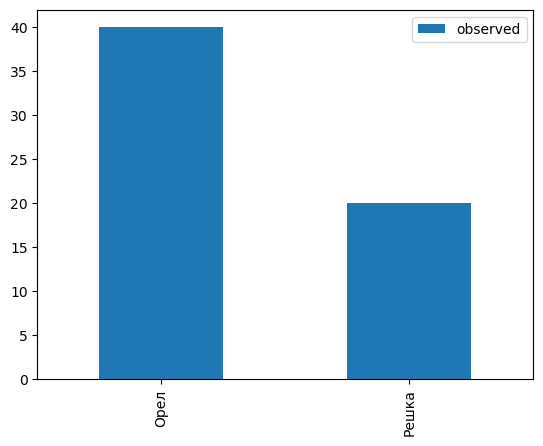

In [60]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

def coin(size=60, tail = None, eagle = None):
    if tail == None or eagle == None:
        arr = [np.random.randint(2) for _ in range(size)]
        tail, eagle = 0, 0
        for i in arr:
            if i == 0:
                tail += 1
            else:
                eagle += 1
    expected_num = size / 2            
    df = pd.DataFrame({'Орел': [eagle, expected_num],
                      'Решка': [tail, expected_num]}, index = ['observed','expected'])
    # График
    df.loc['observed'].to_frame().plot(kind='bar')
    # Вручную
    chi = ((tail - expected_num)**2) / expected_num + ((eagle - expected_num)**2) / expected_num
    p_value = stats.chi2.sf(chi,df.shape[0] - 1)
    # scipy.stats
    chi_2, p_2 = stats.chisquare([tail,eagle])
    print(f'''
    Подсчет вручную:
    Chi\N{SUPERSCRIPT TWO} = {chi}
    p_value = {p_value}
    
    Подсчёт методом stats.chisquare:
    Chi\N{SUPERSCRIPT TWO} = {chi_2}
    p_value = {p_2}
    ''')
    if p_2 < 0.05:
        print(f'Отклоняем H0, {p_value} < 0.05. Наше распределение неравномерно')
    else:
        print('Распределение равномерно')
    return df, chi, p_value

coin(tail=20, eagle=40)

In [65]:
"""Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?"""
from scipy import stats
a = stats.chi2.cdf(2 , df = 2)
b = stats.chi2.cdf(4 , df = 2)
c = b - a
print(a)
print(b)
print(c)

0.6321205588285577
0.8646647167633873
0.23254415793482963


In [80]:
""" Теперь рассчитаем p-уровень значимости для нашего примера с игральной костью. 
    Напомню, что мы получили следующие значения наблюдаемых частот (от единички до шестерки): 
    10, 10, 10, 5, 10, 15
    Проверьте нулевую гипотезу о том, что эмпирическое распределение частот не отличается от равномерного."""

from scipy import stats
import pandas as pd
import numpy as np

ObservedValues = np.asarray([10, 10, 10, 5, 10, 15])
ExpectedValues = 10*np.ones(np.shape(ObservedValues))

chi = np.sum((ObservedValues-ExpectedValues)**2/ExpectedValues)

df = len(ObservedValues) - 1 

p = 1 - stats.chi2.cdf(chi, df) #cdf возвращает площадь справа, а нам надо слева, поэтому отнимаем от 1

if (chi > 0.05):
    print("H0 - принимается, распределение частот не отличается от равномерного")
else:
    print("H0 - отклоняется, распределение частот отличается от равномерного")
    
print("p-value =", p)

H0 - принимается, распределение частот не отличается от равномерного
p-value = 0.415880186995508


In [116]:
"""stats.chisquare"""
def chi_test(obs, exp=None, ddof=0, axis=0):
    chi, p = stats.chisquare(obs, exp, ddof = ddof, axis = axis)

    if (p > 0.05):
        print("H0 - принимается, распределение частот не отличается от равномерного")
    else:
        print("H0 - отклоняется, распределение частот отличается от равномерного")
    
    print("Chi^2 =", chi, "\np-value =", p)

ObservedValues = np.asarray([10, 10, 10, 5, 10, 15])
chi_test(ObservedValues)

H0 - принимается, распределение частот не отличается от равномерного
Chi^2 = 5.0 
p-value = 0.4158801869955079


In [117]:
"""Вернемся к нашему примеру с политическими партиями! 
   Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий.
   Партия А = 10, Партия Б = 30, Партия В = 50."""

chi_test([10,30,50])

H0 - отклоняется, распределение частот отличается от равномерного
Chi^2 = 26.666666666666668 
p-value = 1.61959679231261e-06


In [118]:
""" Недавно я пришел на лекцию в Институт биоинформатики и обнаружил, что в группе различное число студентов 
    женского и мужского пола: 15 юношей и 9 девушек. Возможно, кого-то это и могло бы оставить равнодушным, 
    а я вот сразу взял лист бумаги и ручку, чтобы проверить гипотезу о том, что распределение частот девушек и юношей 
    не отличается от равномерного в генеральной совокупности биоинформатиков! 
    Давайте сверим наши результаты. Введите в поле для ответа получившийся у вас p-уровень значимости."""

chi_test([15,9])

H0 - принимается, распределение частот не отличается от равномерного
Chi^2 = 1.5 
p-value = 0.22067136191984324


In [119]:
"""В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб 
   за информационными коммуникациями между гражданами. Однако его поступок вызвал неоднозначную реакцию в обществе. 
   Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена 
   как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.
   При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной совокупности распределение 
   отношения к поступку Сноудена является равномерным, то есть 50 на 50.
   Введите в ответ получившийся p-уровень значимости для проверки этой гипотезы. """
N = 1500
chi_test(obs = [(N / 100 * 53), (N / 100 * (100-53))], exp = [N/2, N/2])

H0 - отклоняется, распределение частот отличается от равномерного
Chi^2 = 5.4 
p-value = 0.02013675155034633
